In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [175]:
pop = pd.read_csv("C:/Users/Dell/Desktop/eval_mongodb/population1.csv")

In [176]:
superficie = pd.read_csv("C:/Users/Dell/Desktop/eval_mongodb/EuropeSuperficie.csv")

In [177]:
pop = pop.rename(columns={"GEO": "États_membres"})

In [178]:
merge = pop.merge(superficie, left_on='États_membres', right_on='États_membres', how='outer')

In [179]:
final = merge[merge.Value != ":"]

In [180]:
#merge = merge[merge.TIME == 2017.0]
final

,TIME,États_membres,AGE,SEX,UNIT,Value,Flag and Footnotes,Superficie_(km2)
0,2008.0,Union européenne (composition actuelle),Total,Total,Nombre,500297033,b,NaN
1,2009.0,Union européenne (composition actuelle),Total,Total,Nombre,502090235,NaN,NaN
2,2010.0,Union européenne (composition actuelle),Total,Total,Nombre,503170618,b,NaN
3,2011.0,Union européenne (composition actuelle),Total,Total,Nombre,502964837,b,NaN
4,2012.0,Union européenne (composition actuelle),Total,Total,Nombre,504047964,b,NaN
5,2013.0,Union européenne (composition actuelle),Total,Total,Nombre,505161863,NaN,NaN
6,2014.0,Union européenne (composition actuelle),Total,Total,Nombre,507011330,e,NaN
7,2015.0,Union européenne (composition actuelle),Total,Total,Nombre,508540103,be,NaN
8,2016.0,Union européenne (composition actuelle),Total,Total,Nombre,510277177,ep,NaN
9,2017.0,Union européenne (composition actuelle),Total,Total,Nombre,511522671,bp,NaN


In [181]:
final = final.dropna(subset=['Superficie_(km2)'])
final = final.dropna(subset=['Value'])

In [182]:
final = final.drop(columns=['AGE', 'SEX', 'UNIT', 'Flag and Footnotes'])

In [183]:
final['Value'] = final['Value'].astype('int64')

In [184]:
final['Densité'] = final['Value']/final['Superficie_(km2)']

final

,TIME,États_membres,Value,Superficie_(km2),Densité
40,2008.0,Belgique,10666866,30510.0,349.618682
41,2009.0,Belgique,10753080,30510.0,352.444444
42,2010.0,Belgique,10839905,30510.0,355.290233
43,2011.0,Belgique,11000638,30510.0,360.558440
44,2012.0,Belgique,11075889,30510.0,363.024877
45,2013.0,Belgique,11137974,30510.0,365.059784
46,2014.0,Belgique,11180840,30510.0,366.464766
47,2015.0,Belgique,11237274,30510.0,368.314454
48,2016.0,Belgique,11311117,30510.0,370.734743
49,2017.0,Belgique,11351727,30510.0,372.065782


In [185]:
liste = final.groupby(['États_membres', 'TIME'])['Densité'].mean()
liste = liste.sort_values(ascending=False)
liste = liste.to_frame()
liste = liste.reset_index()
liste

,États_membres,TIME,Densité
0,Malte,2017.0,1456.636076
1,Malte,2016.0,1425.363924
2,Malte,2015.0,1391.427215
3,Malte,2014.0,1358.936709
4,Malte,2013.0,1337.053797
5,Malte,2012.0,1321.348101
6,Malte,2011.0,1313.256329
7,Malte,2010.0,1310.212025
8,Malte,2009.0,1300.398734
9,Malte,2008.0,1290.607595


In [186]:
malte = pd.DataFrame(liste[liste['États_membres'] == 'Malte'])
pb = pd.DataFrame(liste[liste['États_membres'] == 'Pays-Bas'])
belgique = pd.DataFrame(liste[liste['États_membres'] == 'Belgique'])
ru = pd.DataFrame(liste[liste['États_membres'] == 'Royaume-Uni'])
lux = pd.DataFrame(liste[liste['États_membres'] == 'Luxembourg'])


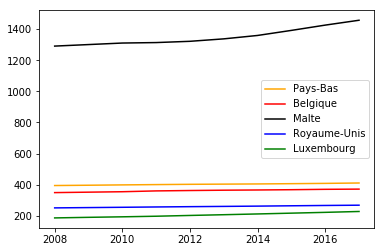

In [189]:
#ax = sns.lineplot(x="TIME", y="Densité", hue="États_membres", data=final[final['États_membres'] == liste_etat])


ax1 = plt.plot(pb.TIME,pb.Densité, color='orange', label='Pays-Bas')
ax2 = plt.plot(belgique.TIME,belgique.Densité, color='red', label='Belgique')
ax3 = plt.plot(malte.TIME,malte.Densité, color='black', label='Malte')
ax4 = plt.plot(ru.TIME,ru.Densité, color='blue', label='Royaume-Unis')
ax5 = plt.plot(lux.TIME,lux.Densité, color='green', label='Luxembourg')

plt.legend()
plt.show()